In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# email classification

In [3]:
df = pd.read_csv("9-email_classification_svm.csv")

In [4]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [5]:
df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.isnull().sum()

subject_formality_score      0
sender_relationship_score    0
email_type                   0
dtype: int64

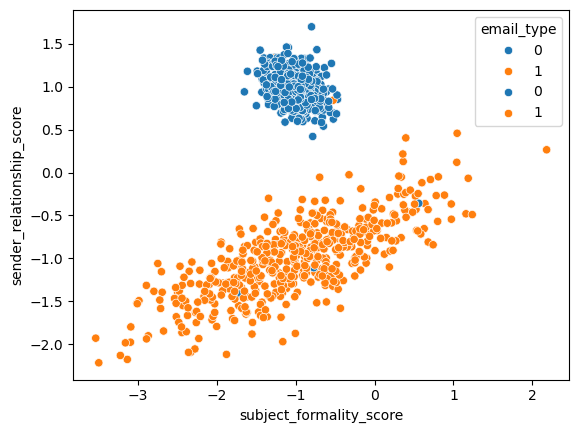

In [9]:
sns.scatterplot(x = df["subject_formality_score"], y = df["sender_relationship_score"], hue = df["email_type"])
plt.show()

In [10]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [11]:
X = df.drop("email_type", axis = 1)
y = df["email_type"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 15)

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(kernel = "linear")

In [15]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       170
           1       1.00      0.99      1.00       160

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

[[170   0]
 [  1 159]]


In [19]:
df = pd.read_csv("9-loan_risk_svm.csv")

In [20]:
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


In [22]:
df.describe()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
count,1000.000000,1000.000000,1000.000000
mean,-0.024200,-0.018748,0.504000
std,1.257080,1.222329,0.500234
min,-3.562160,-2.641815,0.000000
25%,-1.001007,-0.995190,0.000000
50%,-0.105200,-0.142727,1.000000
75%,1.007451,0.964210,1.000000
max,2.984892,3.338639,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


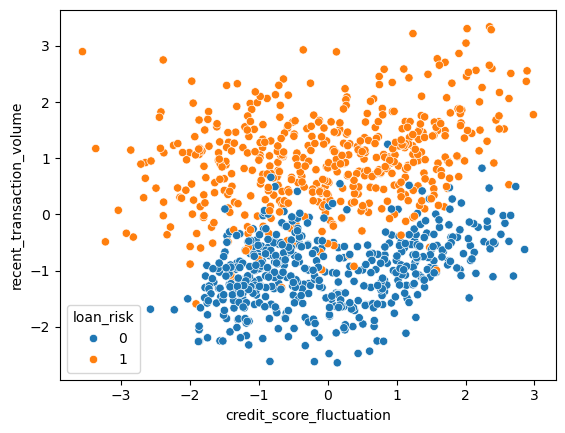

In [26]:
sns.scatterplot(x = df["credit_score_fluctuation"], y = df["recent_transaction_volume"],hue= df["loan_risk"])
plt.show()

In [27]:
X = df.drop("loan_risk", axis = 1)
y = df["loan_risk"]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 15)


In [34]:
linear = SVC(kernel = "linear")
linear.fit(X_train, y_train)
y_pred3 = linear.predict(X_test)
print(classification_report(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       160
           1       0.93      0.91      0.92       170

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330

[[148  12]
 [ 16 154]]


In [36]:
rbf = SVC(kernel = "rbf")
rbf.fit(X_train, y_train)
y_pred4 = rbf.predict(X_test)
print(classification_report(y_pred4,y_test))
print(confusion_matrix(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       166
           1       0.92      0.93      0.93       164

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330

[[153  13]
 [ 11 153]]


In [37]:
poly = SVC(kernel = "poly")
poly.fit(X_train, y_train)
y_pred5 = poly.predict(X_test)
print(classification_report(y_pred5,y_test))
print(confusion_matrix(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       147
           1       0.95      0.86      0.91       183

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330

[[139   8]
 [ 25 158]]


In [38]:
sigmoid = SVC(kernel = "sigmoid")
sigmoid.fit(X_train, y_train)
y_pred6 = sigmoid.predict(X_test)
print(classification_report(y_pred6,y_test))
print(confusion_matrix(y_pred6,y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       159
           1       0.85      0.82      0.84       171

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[134  25]
 [ 30 141]]
